## Multiple linear regression model for the prediction of demand for shared bikes.

### Importing and Understanding Data¶

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing all required python library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import sklearn
from sklearn.model_selection import  train_test_split
import statsmodels.api as sm

In [3]:
#Importing Housing.csv
day = pd.read_csv('/home/raghavendra/Downloads/day.csv')

In [4]:
# Looking at the first five rows
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Looking at last five rows
day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


## Inspect the data

In [6]:
day.shape

(730, 16)

In [7]:
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
day['dteday'] = pd.to_datetime(day['dteday'],format="%d-%m-%Y") #converting the object type column to datetime datatype

In [9]:
day.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [10]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


In [12]:
# look at the duplication in the df
day.duplicated().sum()

np.int64(0)

In [13]:
#Checking missing value any present or not
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Pre_processing data

#### Mapping all values of categorical variable from data of dictionary by replacing

In [14]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
day["season"].replace([1,2,3,4],["spring","summer","fall","winter"], inplace=True)

##  year (0: 2018, 1:2019)
day["yr"].replace([0,1],["2018","2019"], inplace=True)

##  weathersit 1: Clear , 2: Mist , 3: Light Snow , 4: Heavy Rain
day["weathersit"].replace([1,2,3,4],["Clear","Mist","Light Snow","Heavy Rain" ], inplace=True)

## if day is neither weekend nor holiday is 1, otherwise is 0.
day["holiday"].replace([0,1],["No","Yes"], inplace=True)

## if day is neither weekend nor holiday is 1, otherwise is 0.
day["workingday"].replace([0,1],["No","Yes"], inplace=True)

##  Monday to Sunday
day["weekday"].replace([0,1,2,3,4,5,6],["Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday","Monday" ], inplace=True)


In [15]:
# Checking the converted value
day.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,No,Monday,No,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,1,No,Tuesday,No,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,1,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,1,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562


In [16]:
# Extract useful insight of working and non-working days 
working_days = day[day["workingday"] == "Yes"]["weekday"].unique()
non_working_days = day[day["workingday"] == "No"]["weekday"].unique()

# Print for EDA
print(" Working Days:", working_days)
print(" Non-Working Days (Weekends/Holidays):", non_working_days)


 Working Days: ['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
 Non-Working Days (Weekends/Holidays): ['Monday' 'Tuesday' 'Wednesday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


##### Interesting Insight:
 - Monday and Tuesday are consistently non-working days, unlike other days that fluctuate between working and non-working.
 - This suggests that the biking company experiences **low business on Mondays and Tuesdays**.
 - However, Saturday and Sunday appear in both categories, which might indicate **irregular work schedules or data inconsistencies**.


In [17]:
# Dropping column that is not useful for data analysis based
day = day.drop(columns=['instant', 'dteday','casual','registered'])
day.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,No,Monday,No,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,No,Tuesday,No,Mist,14.902598,17.68695,69.6087,16.652113,801


In [18]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 68.6+ KB


In [19]:
day.describe(include='all')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730,730,730.000000,730,730,730,730,730.000000,730.000000,730.000000,730.000000,730.000000
unique,4,2,NaN,2,7,2,3,NaN,NaN,NaN,NaN,NaN
top,fall,2018,NaN,No,Monday,Yes,Clear,NaN,NaN,NaN,NaN,NaN
freq,188,365,NaN,709,105,499,463,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.526027,NaN,NaN,NaN,NaN,20.319259,23.726322,62.765175,12.763620,4508.006849
std,NaN,NaN,3.450215,NaN,NaN,NaN,NaN,7.506729,8.150308,14.237589,5.195841,1936.011647
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,22.000000
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,26.880615,30.445775,72.989575,15.625589,5966.000000


## Visualising the Data 

Key Considerations:

    1) Multicollinearity: Check correlation among predictor variables. If two or more predictors are highly correlated, it might affect model interpretation.
    2)Feature Importance: Evaluate how strongly each predictor influences the outcome variable.
    3) Data Cleaning: Remove or transform features if needed to avoid bias or misleading results.


In [20]:
# Get the numeric columns from the day DataFrame
numeric_columns = day.select_dtypes(include=['number']).columns

# Print the numeric columns
print(numeric_columns)


Index(['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')


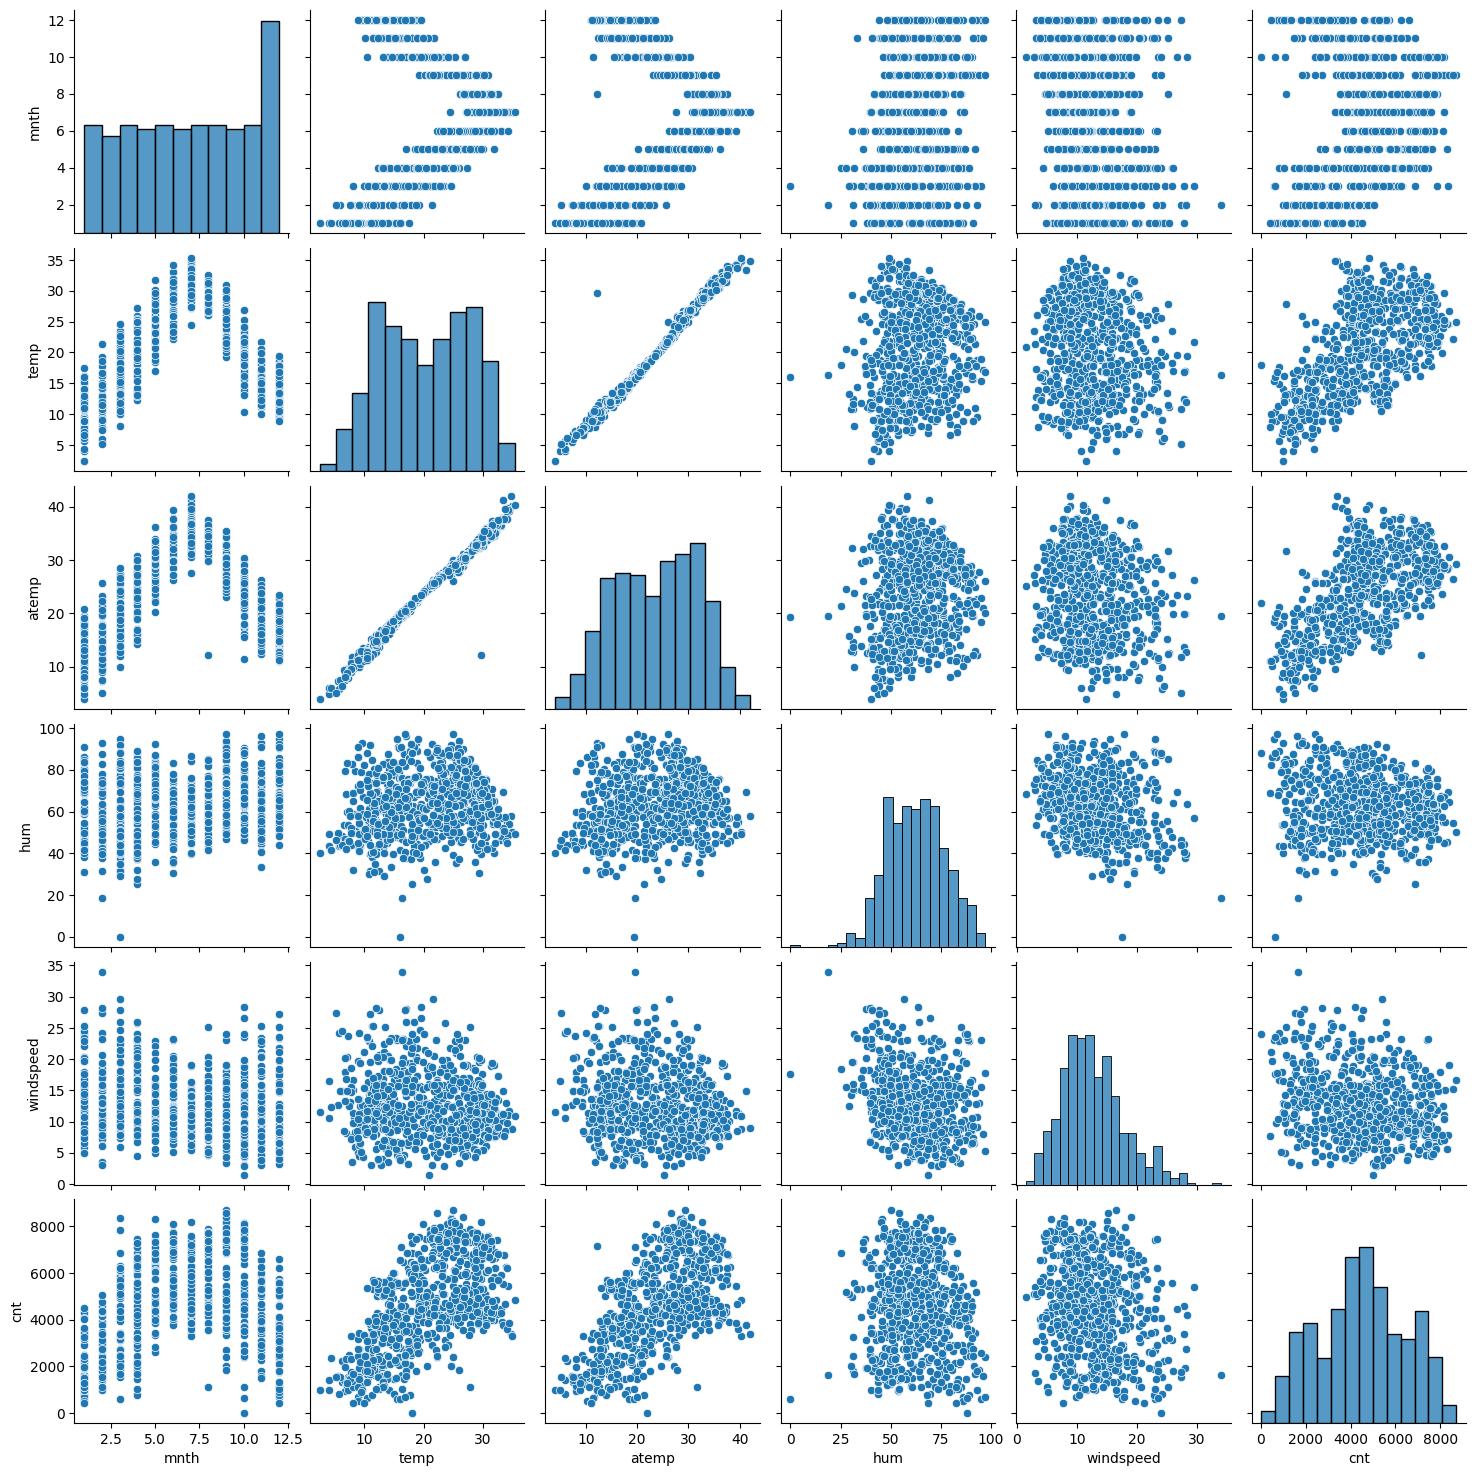

In [21]:
# visualising the data now from the above numerical columns 
sns.pairplot(day[numeric_columns])
plt.show()

##### To make the visualizations more interpretable and insightful, we will removing unnecessary numeric columns and elimiating the highly correlated variables colunms too. This will help avoid overcrowding the plot and allow us to focus on the most relevant features for analysis.

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


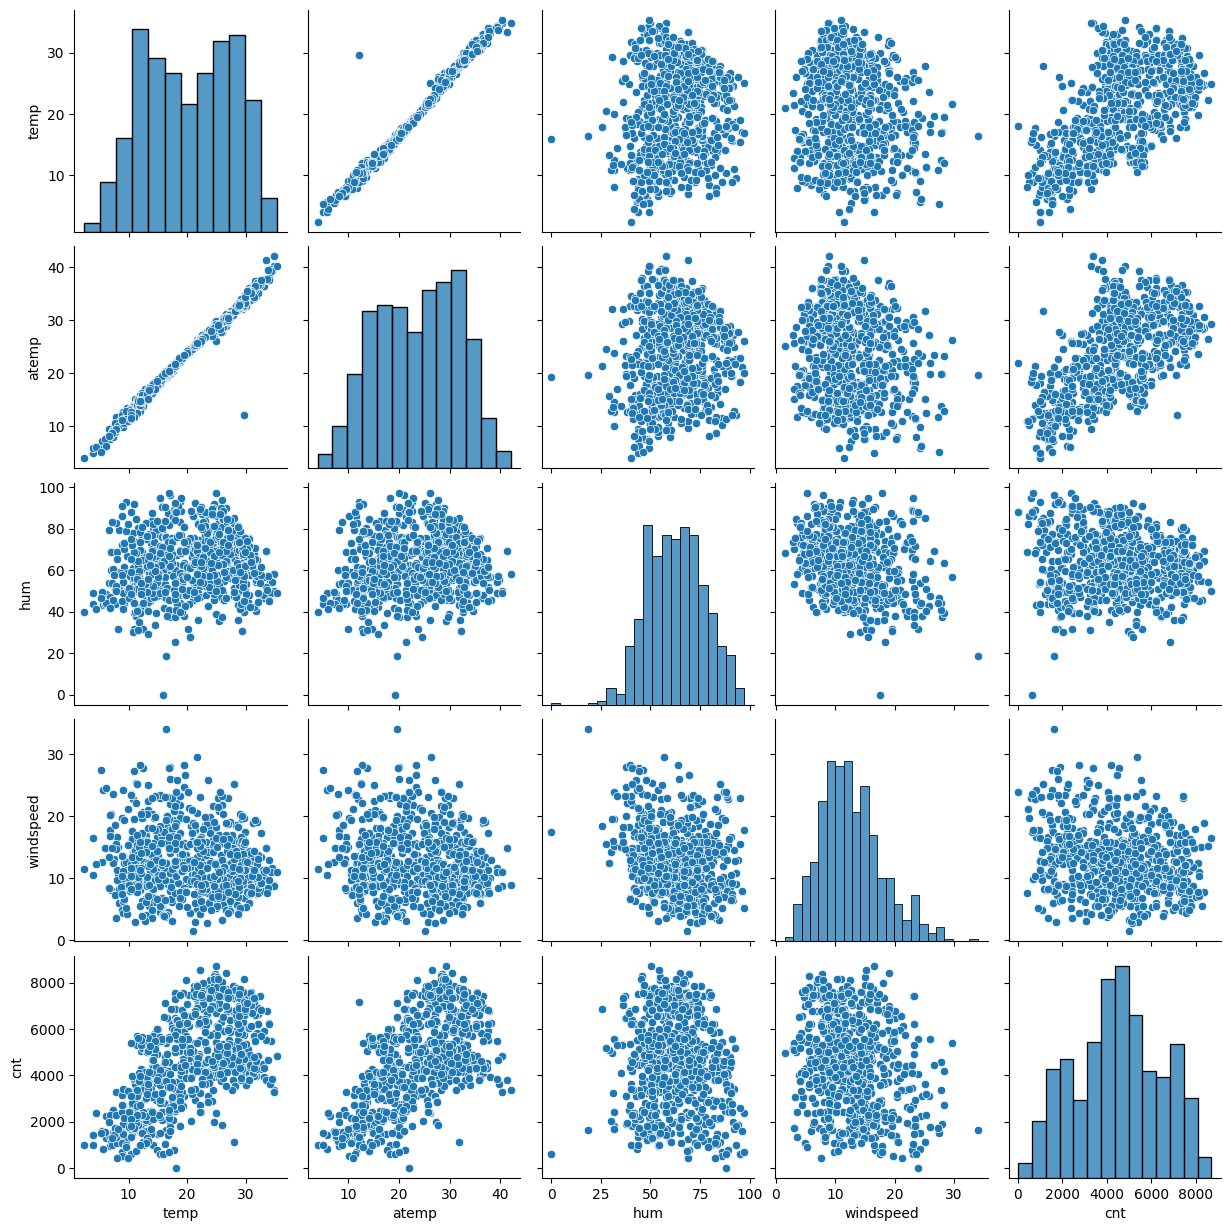

In [22]:
# List of desired columns
desired_columns = ['temp','atemp','hum', 'windspeed', 'casual', 'registered', 'cnt']

# Filter the numeric columns to include only the desired ones
filtered_numeric_columns = [col for col in numeric_columns if col in desired_columns]

# Print the filtered list of numeric columns
print(filtered_numeric_columns)
sns.pairplot(day[filtered_numeric_columns])
plt.show()

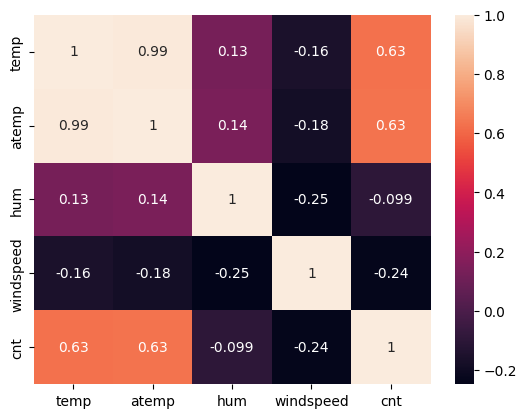

In [23]:
## plot the correlation in the dataframe without considering the object type variables
filtered_day_df=day[filtered_numeric_columns]
# Plot the heatmap
sns.heatmap(filtered_day_df.corr(), annot=True)
# Show the plot
plt.show()

### Data Observation from above Heatmap:

 - Temp and atemp are highlt correlated to be removed
 - Temp, hum and windspeed helps in the bike count number

### Visualizing Categorical Variables

We have a few categorical variables in the dataset. To understand how these variables influence the target variable (cnt), we can create boxplots for each of these categorical variables.

Visualizing the relationship between categorical variables and bike count (cnt):

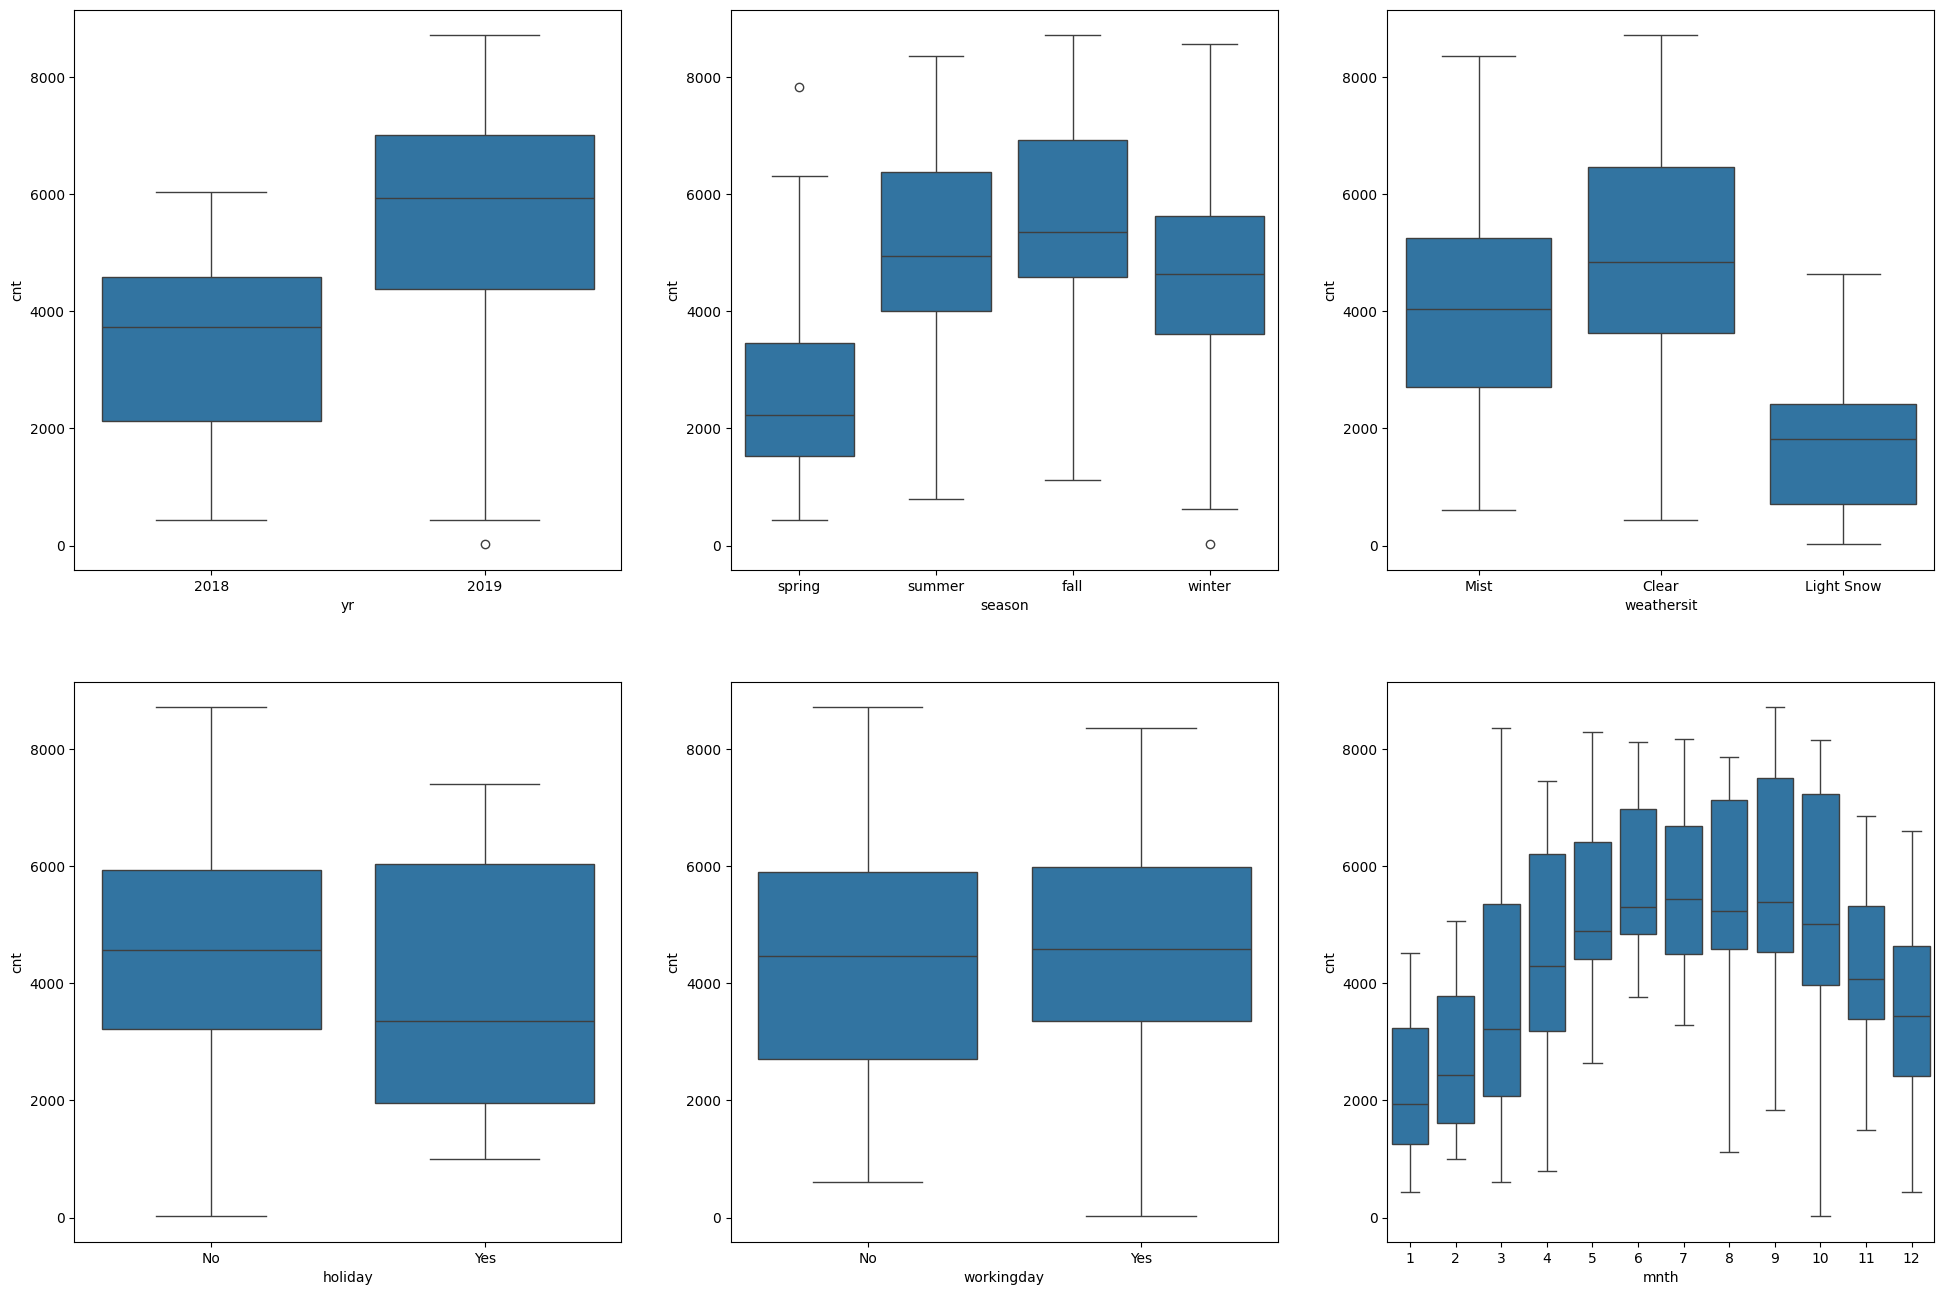

In [24]:
# Set up the figure size and layout
plt.figure(figsize=(24, 16))

# Boxplot for 'yr' vs 'cnt'
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = day)

# Boxplot for 'season' vs 'cnt'
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = day)

# Boxplot for 'weathersit' vs 'cnt'
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)

# Boxplot for 'holiday' vs 'cnt'
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)

# Boxplot for 'workingday' vs 'cnt'
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

# Boxplot for 'mnth' vs 'cnt'
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)

# Display the plot
plt.show()


#### Data Insights from the Above Categorical Plots:

- The bike rentals were higher in 2019 compared to 2018.
- The peak rental seasons are Fall, Summer, Winter, and Spring, with the highest demand in Fall and Summer.
- Clear and Misty weather conditions contribute to the most bike rentals.
- Rentals are lower on days that are not holidays.
- Working days see a significantly higher volume of bike rentals compared to non-working days.


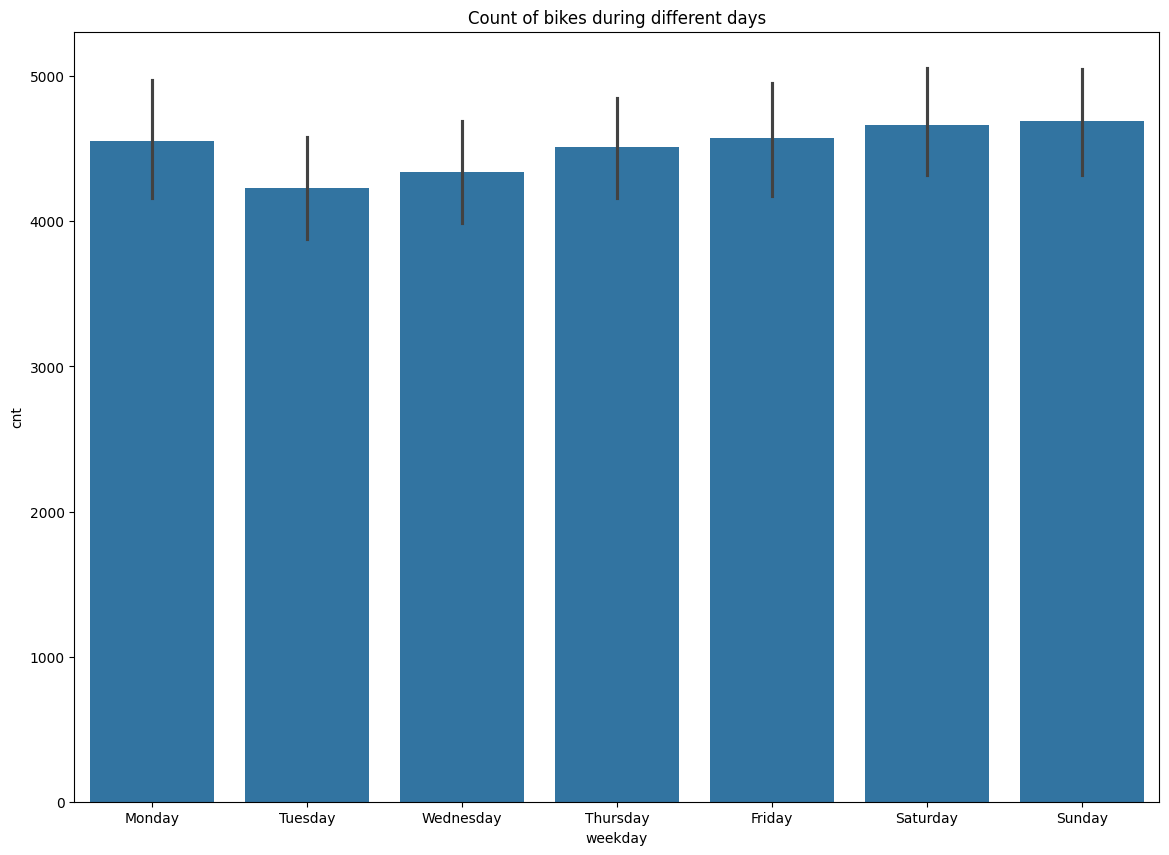

In [25]:
#Count of bikes on different days 
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=day, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')
plt.show()

### Data Insights from the Weekday Chart:

- Friday, Saturday, and Sunday experience the highest bike rentals.
- Bike rentals are notably lower on Monday and Tuesday.
- Monday and Tuesday appear to be non-working days for the bike rental company.


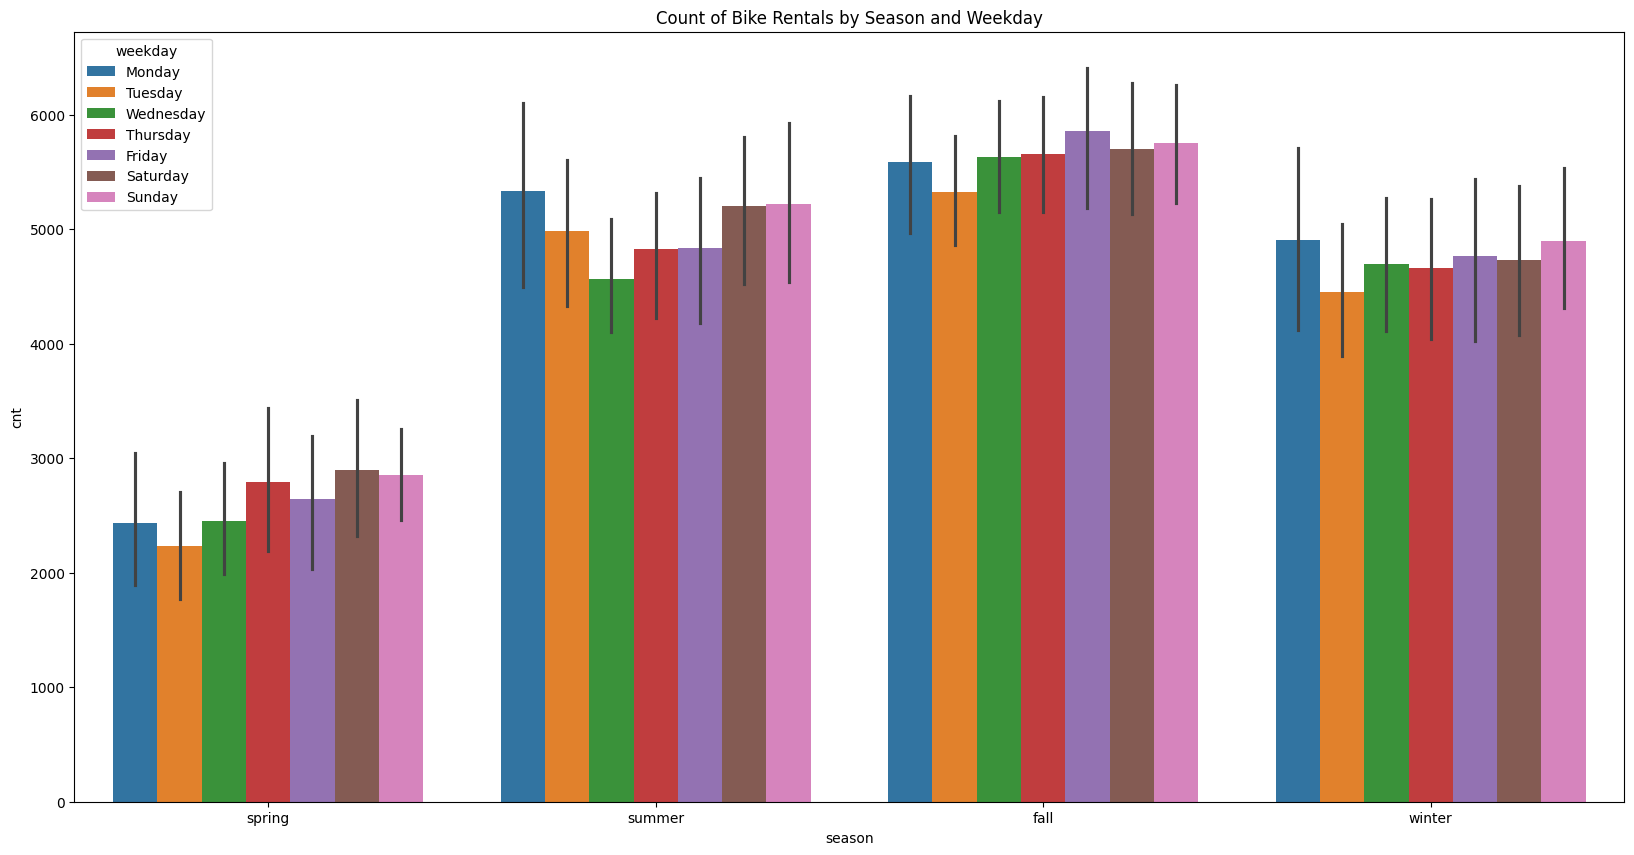

In [26]:
#Visualization of Bike Rentals Across Seasons and Weekdays:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=day, x='season', y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of Bike Rentals by Season and Weekday')
plt.show()


### Observations:

1. There are very few rentals on winter and summer days. 
2. It seems that one day in winter shows a high rental count, possibly due to favorable weather conditions.

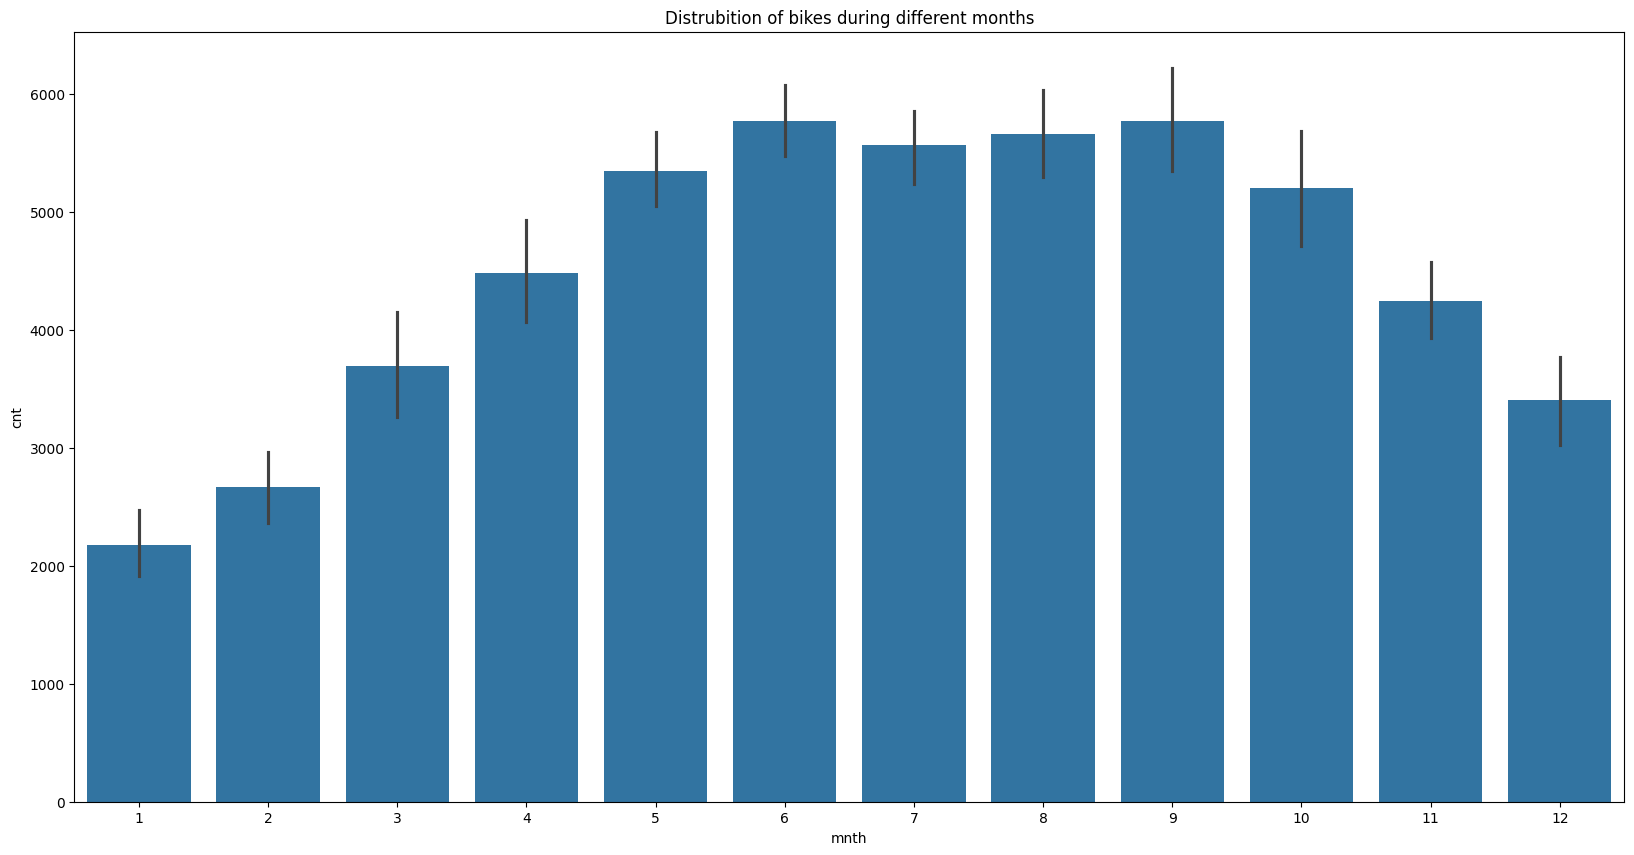

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=day, x='mnth', y='cnt', ax=ax)
ax.set(title='Distrubition of bikes during different months')
plt.show()


### Observation:
- "Not many bikes are rented during the months of January and February due to the peak winter season. It's possible that the bikes are moved to other cities during this period.

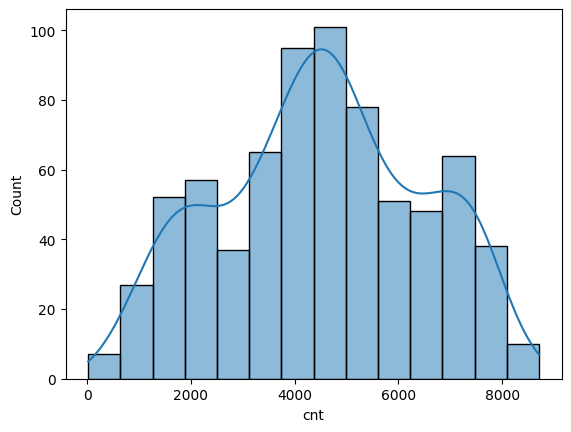

In [28]:
#Visualizing the distribution of bike rentals using a histogram
sns.histplot(day["cnt"], kde=True)
plt.show()


In [29]:
#applying a transformation to reduce the skewness.
day["cnt"] = np.log(day["cnt"])

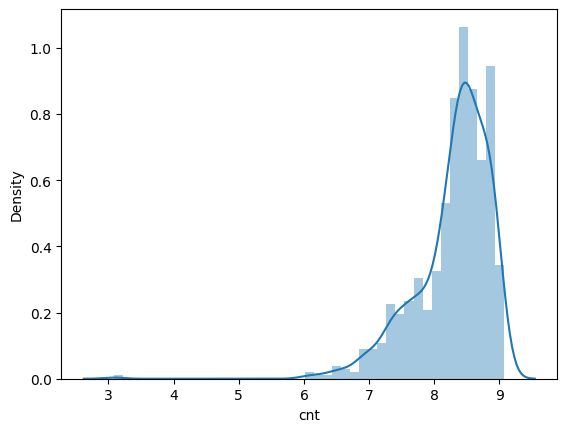

In [30]:
sns.distplot(day["cnt"])
plt.show()

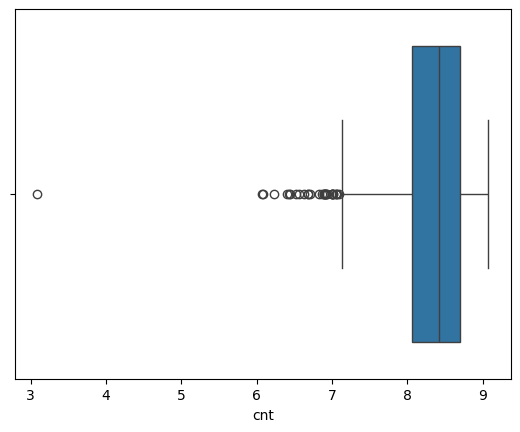

In [31]:
sns.boxplot(x="cnt",data=day)
plt.show()

### Removing Outliers Using the IQR (Interquartile Range) Method

In [32]:
Q1 = day['cnt'].quantile(0.25)
Q3 = day['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
day = day[(day['cnt'] >= (Q1 - 1.5 * IQR)) & (day['cnt'] <= (Q3 + 1.5 * IQR))]

# Check the shape after removing outliers
day.shape


(698, 12)

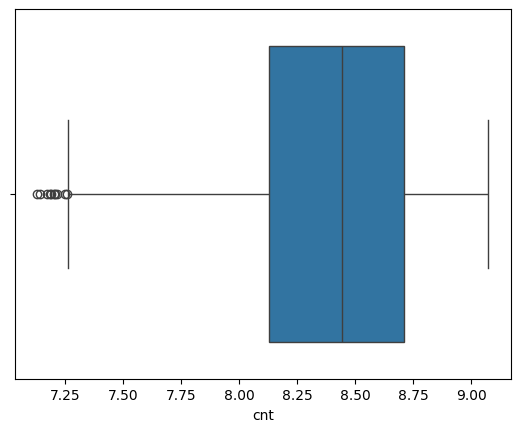

In [33]:
#Now let's see again with the box plot visualization
sns.boxplot(x="cnt",data=day)
plt.show()

## Data Preparation and cleaning

- You can see that your dataset has many columns that are categorical  values 

- We need to perform one hot Encoding for dummy variable

In [34]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 2 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      698 non-null    object 
 1   yr          698 non-null    object 
 2   mnth        698 non-null    int64  
 3   holiday     698 non-null    object 
 4   weekday     698 non-null    object 
 5   workingday  698 non-null    object 
 6   weathersit  698 non-null    object 
 7   temp        698 non-null    float64
 8   atemp       698 non-null    float64
 9   hum         698 non-null    float64
 10  windspeed   698 non-null    float64
 11  cnt         698 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 70.9+ KB


In [35]:
# Change specified columns from int and object to category type
cols = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr']

for col in cols:
    day[col] = day[col].astype('category')

# Check the data types of the DataFrame
day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 2 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      698 non-null    category
 1   yr          698 non-null    category
 2   mnth        698 non-null    category
 3   holiday     698 non-null    category
 4   weekday     698 non-null    category
 5   workingday  698 non-null    category
 6   weathersit  698 non-null    category
 7   temp        698 non-null    float64 
 8   atemp       698 non-null    float64 
 9   hum         698 non-null    float64 
 10  windspeed   698 non-null    float64 
 11  cnt         698 non-null    float64 
dtypes: category(7), float64(5)
memory usage: 38.9 KB


In [36]:
day.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
2,spring,2018,1,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,7.207119
3,spring,2018,1,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,7.353722


In [37]:
# Dummy testing on the 'season' column 
pd.get_dummies(day['season'], prefix='season',drop_first=True)

,season_spring,season_summer,season_winter
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
6,True,False,False
...,...,...,...
725,True,False,False
726,True,False,False
727,True,False,False
728,True,False,False


In [38]:
#Applying dummy tests to the required categorical columns:

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

req_cols = ['season','mnth','holiday','weekday','workingday','weathersit','yr']

for col in req_cols:
    day = one_hot_encoding(day, col)

day.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
2,8.050924,9.47025,43.7273,16.636703,7.207119,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,8.200000,10.60610,59.0435,10.739832,7.353722,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,9.305237,11.46350,43.6957,12.522300,7.377759,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,8.378268,11.66045,51.8261,6.000868,7.381502,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
6,8.057402,10.44195,49.8696,11.304642,7.319865,True,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [39]:
day['season_spring'].value_counts()

season_spring
False    543
True     155
Name: count, dtype: int64

## Splitting the Data into Training and Testing Sets

- As known, the first basic step for regression is performing a train-test split.

In [40]:
# split the data in training and testing dataset (70% train and 30% test)

day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
print(day_train.shape)
print(day_test.shape)

(488, 30)
(210, 30)


In [42]:
day_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
431,21.627500,26.23020,56.7500,29.584721,8.590815,True,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
451,19.850847,23.54750,48.1250,19.541957,8.647871,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
265,24.975847,26.10625,97.2500,5.250569,7.781139,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
498,23.506653,27.49500,78.9583,14.250364,7.952615,False,True,False,False,False,...,False,False,False,False,False,True,True,False,True,True
245,27.435847,31.66065,71.6667,12.416775,8.408271,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [43]:
day_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
410,14.281653,17.58145,53.1250,12.167200,8.335431,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
342,11.924153,15.87710,69.5833,5.542019,8.194229,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
248,22.140000,25.76000,88.6957,23.044181,7.904704,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,False
447,20.602500,24.33665,88.5417,12.916461,8.123261,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,True
421,11.445847,13.41540,41.0000,13.750343,8.128290,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


### Rescaling the Features 

We will use MinMax scaling to rescale the variables to ensure they are on a comparable scale. If the scales are not comparable, some of the coefficients in the regression model may end up being disproportionately large or small compared to others, which can complicate model evaluation

In [44]:
day_train_re_col=day_train.select_dtypes(include=['float64']).columns
print(day_train_re_col)

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
day_train[day_train_re_col] = scaler.fit_transform(day_train[day_train_re_col])

day_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
431,0.562766,0.562508,0.483802,0.864144,0.750512,True,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
451,0.506068,0.488294,0.373871,0.555133,0.780052,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
265,0.669622,0.559079,1.000000,0.115395,0.331304,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
498,0.622736,0.597497,0.766861,0.392314,0.420085,False,True,False,False,False,...,False,False,False,False,False,True,True,False,True,True
245,0.748128,0.712735,0.673925,0.335896,0.656000,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


### Dividing into X and Y sets for the model building

In [47]:
y_train = day_train.pop('cnt')
X_train = day_train

In [48]:
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
431,0.562766,0.562508,0.483802,0.864144,True,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True
451,0.506068,0.488294,0.373871,0.555133,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
265,0.669622,0.559079,1.000000,0.115395,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
498,0.622736,0.597497,0.766861,0.392314,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
245,0.748128,0.712735,0.673925,0.335896,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [49]:
y_train.head()

431    0.750512
451    0.780052
265    0.331304
498    0.420085
245    0.656000
Name: cnt, dtype: float64

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.False_, np.int64(14)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_2', np.False_, np.int64(15)),
 ('mnth_3', np.True_, np.int64(1)),
 ('mnth_4', np.False_, np.int64(3)),
 ('mnth_5', np.False_, np.int64(2)),
 ('mnth_6', np.False_, np.int64(6)),
 ('mnth_7', np.False_, np.int64(11)),
 ('mnth_8', np.False_, np.int64(7)),
 ('mnth_9', np.False_, np.int64(4)),
 ('mnth_10', np.False_, np.int64(5)),
 ('mnth_11', np.False_, np.int64(9)),
 ('mnth_12', np.False_, np.int64(8)),
 ('holiday_Yes', np.True_, np.int64(1)),
 ('weekday_Monday', np.False_, np.int64(12)),
 ('weekday_Saturday', np.False_, np.int64(18)),
 ('weekday_Sunday', np.False_, np.int64(17)),
 ('weekday_Thursday', np.False_, np.int64(16)),
 ('weekday_Tuesday', np.False_, np.int64(19)),
 ('weekday_Wednesday', np.False_, np.int6

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_3', 'holiday_Yes', 'weathersit_Light Snow', 'yr_2019'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes',
       'weathersit_Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
X_train_rfe = X_train_rfe.astype(float)
y_train = y_train.astype(float)


In [58]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [59]:
lm.params

const                    0.339638
temp                     0.254996
atemp                    0.275212
hum                     -0.110902
windspeed               -0.108941
season_spring           -0.142464
season_winter            0.091614
mnth_3                   0.040576
holiday_Yes             -0.091089
weathersit_Light Snow   -0.235884
yr_2019                  0.245280
dtype: float64

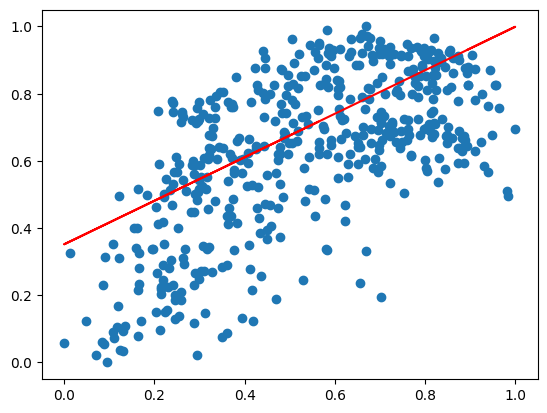

In [60]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_rfe.iloc[:, 1], y_train)
plt.plot(X_train_rfe.iloc[:, 1],  0.351906 + 0.647228*X_train_rfe.iloc[:, 1], 'r')
plt.show()

In [61]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     218.8
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          4.13e-171
Time:                        23:29:25   Log-Likelihood:                 433.01
No. Observations:                 488   AIC:                            -844.0
Df Residuals:                     477   BIC:                            -797.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

#### Drop temp or atemp (Multicollinearity Issue)

Fix: Check VIF (Variance Inflation Factor) and consider removing one of them.


In [62]:
# Calculate the VIFs for the temp and atemp 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,48.89
2,atemp,47.40
0,const,44.97
5,season_spring,2.41
6,season_winter,1.83
3,hum,1.28
4,windspeed,1.18
9,weathersit_Light Snow,1.14
7,mnth_3,1.12
10,yr_2019,1.02


#### 
Since temp and atemp are highly correlated, remove one (let's drop temp since atemp has a slightly better p-value).

In [63]:
X_train_rfe.columns

Index(['const', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'holiday_Yes', 'weathersit_Light Snow',
       'yr_2019'],
      dtype='object')

In [64]:
# Drop 'temp' from training and test sets
X_train_new = X_train_rfe.drop(columns=['temp'])

#day_train_re_col = [col for col in day_train_re_col if col != 'temp']
# Refit the model after dropping temp
#X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, sm.add_constant(X_train_new)).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     241.4
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          1.51e-171
Time:                        23:29:25   Log-Likelihood:                 431.19
No. Observations:                 488   AIC:                            -842.4
Df Residuals:                     478   BIC:                            -800.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [65]:
# Calculate the VIFs for the temp and atemp 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.57
1,atemp,2.37
4,season_spring,2.34
5,season_winter,1.74
2,hum,1.28
3,windspeed,1.16
8,weathersit_Light Snow,1.13
6,mnth_3,1.12
9,yr_2019,1.02
7,holiday_Yes,1.01


#### Improvements based on the above updated Model after dropping temp
Multicollinearity Handled:
   
     temp was removed, and atemp is now significant (p < 0.05).
   
R² & Adjusted R² Remain Stable:
   
     R² = 0.820 (previously 0.821) → Minimal impact from dropping temp.
   
     AIC & BIC Slightly Increased → Indicates a potential loss in model fit, but acceptable.


#### 

But Still we can make much more better improvement for model along by watching with visualization i.e,Handle Non-Normal Residuals (Check Skewness & Outliers)

Issue: Residuals are Not Normally Distributed

Jarque-Bera Test (p < 0.05) → Residuals are skewed.

   Skewness = -0.882 → Left-skewed, meaning some outliers or a non-linear relationship.

Solution: Apply Log Transformation on Target Variable (cnt)
This helps normalize residuals and reduce the effect of outliers.


### Step1:Visualizing Residuals for Normality & Outliers


In [66]:
# Get residuals from the model
residuals = lr.resid  

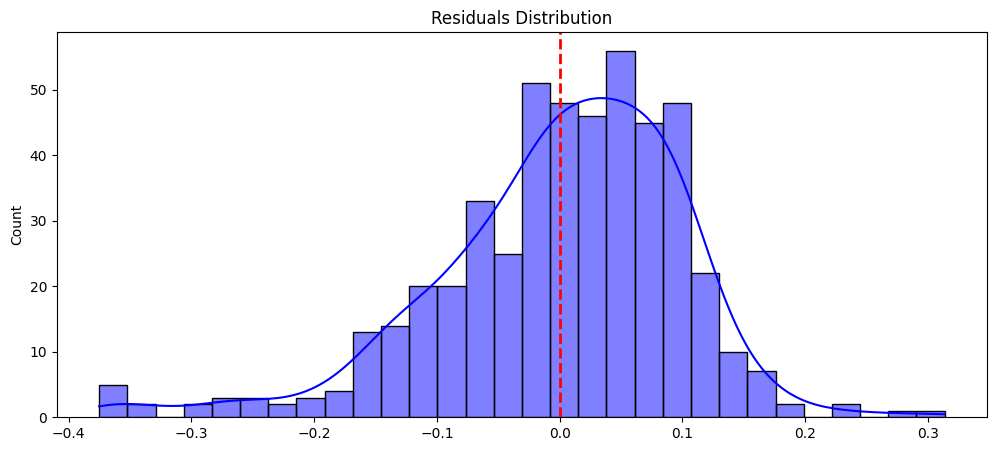

In [67]:
plt.figure(figsize=(12,5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2)
plt.title("Residuals Distribution")
plt.show()

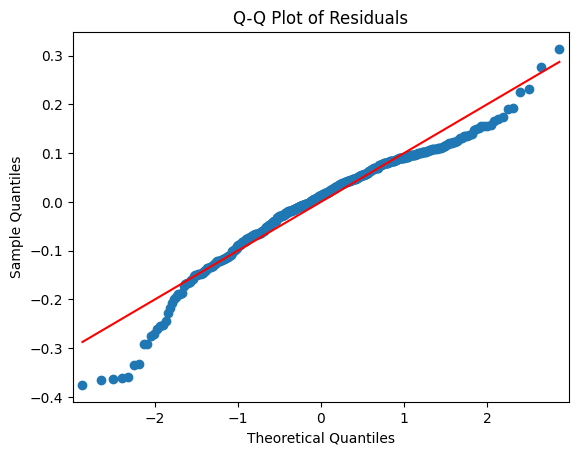

In [68]:
#Q-Q Plot (Check Normality)
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

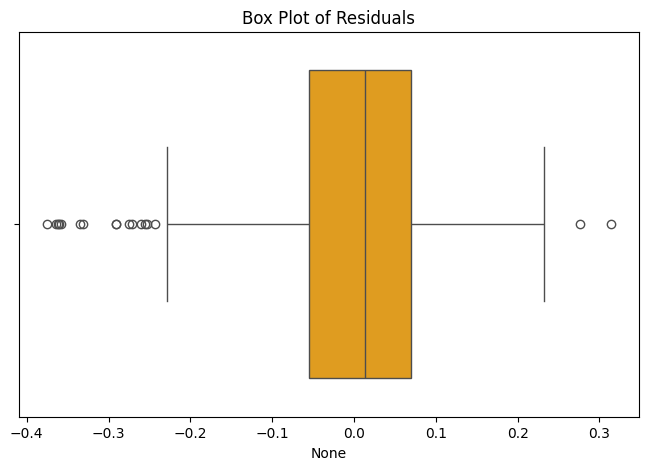

In [69]:
# Box Plot (Detect Outliers)
plt.figure(figsize=(8,5))
sns.boxplot(x=residuals, color='orange')
plt.title("Box Plot of Residuals")
plt.show()


In [70]:
print(f"Skewness: {residuals.skew():.3f}")
print(f"Kurtosis: {residuals.kurtosis():.3f}")

Skewness: -0.885
Kurtosis: 1.716


### Step 2: How to Fix Non-Normal Residuals?

Based on the visualization:
- If histogram shows skewness & Q-Q plot deviates from the line → Apply log transformation on cnt.

- If box plot shows many outliers → Remove them using Z-score filtering

In [71]:
# Fix:1 Apply Log Transformation to cnt
y_train_log = np.log(y_train + 1)

# Refit the model with log-transformed target
lr_log = sm.OLS(y_train_log, sm.add_constant(X_train_new)).fit()



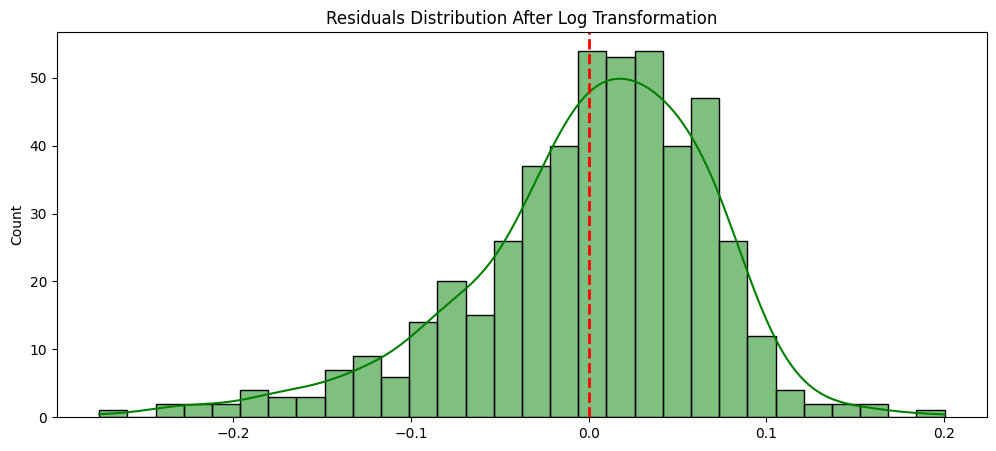

In [72]:
# Check updated residuals
residuals_log = lr_log.resid
# Plot histogram after log transformation
plt.figure(figsize=(12,5))
sns.histplot(residuals_log, bins=30, kde=True, color='green')
plt.axvline(residuals_log.mean(), color='red', linestyle='dashed', linewidth=2)
plt.title("Residuals Distribution After Log Transformation")
plt.show()


In [73]:
print(lr_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          1.03e-164
Time:                        23:29:26   Log-Likelihood:                 615.25
No. Observations:                 488   AIC:                            -1211.
Df Residuals:                     478   BIC:                            -1169.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [74]:
#Fix:2 Remove Outliers using Z-score
from scipy.stats import zscore

# Calculate Z-scores of residuals
z_scores = zscore(residuals)
outliers = abs(z_scores) > 3  # Outliers beyond 3 std deviations
# Remove outliers from training data
X_train_new_clean = X_train_new[~outliers]
y_train_clean = y_train[~outliers]

# Refit the model
lr_clean = sm.OLS(y_train_clean, sm.add_constant(X_train_new_clean)).fit()


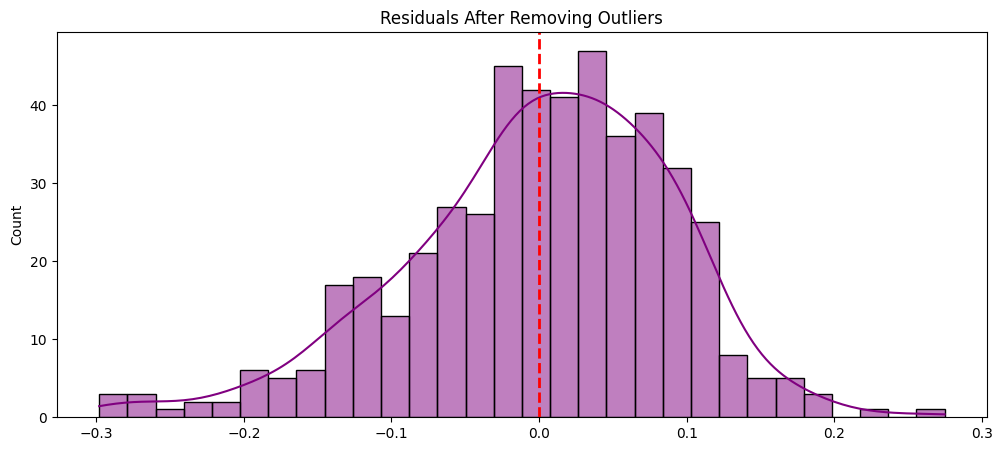

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     306.6
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          2.00e-190
Time:                        23:29:26   Log-Likelihood:                 477.87
No. Observations:                 480   AIC:                            -935.7
Df Residuals:                     470   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

In [75]:
# Check new residuals
residuals_clean = lr_clean.resid

# Plot histogram after removing outliers
plt.figure(figsize=(12,5))
sns.histplot(residuals_clean, bins=30, kde=True, color='purple')
plt.axvline(residuals_clean.mean(), color='red', linestyle='dashed', linewidth=2)
plt.title("Residuals After Removing Outliers")
plt.show()

print(lr_clean.summary())

####
The slight drop in R-squared from 0.854 to 0.853 after removing the holiday_Yes feature is quite minimal, suggesting that the model's performance hasn't been drastically affected. Given that 0.853 still indicates a very good fit (explaining 85.3% of the variance), it's acceptable to proceed with further modeling.

In [76]:
X_train_new_clean_hol = X_train_new_clean.drop(columns=['holiday_Yes'])
lr_no_holiday = sm.OLS(y_train_clean, sm.add_constant(X_train_new_clean_hol)).fit()

print(lr_no_holiday.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     342.6
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          6.36e-191
Time:                        23:29:26   Log-Likelihood:                 476.02
No. Observations:                 480   AIC:                            -934.0
Df Residuals:                     471   BIC:                            -896.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

#### Key observations from the above summary after re-fiting the model

1) R-squared (0.853): The model explains 85.3% of the variation in the target variable (cnt), which is good.

2) P-values: Most features in the model (like temperature, humidity, season, and year) are statistically significant (p-values < 0.05), meaning they have a real impact on the count.

3) Coefficients:


        Temperature (atemp) increases the count.
        Humidity (hum) decreases the count.
        Windspeed reduces the count.
        Spring season decreases the count, while Winter increases it.
        March (mnth_3) has a positive impact on the count.
        Light Snow weather decreases the count.
        2019 has a higher count compared to the previous year.

   

5) Model fit: The model is statistically solid with a good fit, but residual analysis is needed to check for any unusual patterns in the data.

6) No serious autocorrelation: The model's residuals don’t show any significant autocorrelation, which means the errors are random.

Next Steps:

Check for Multicollinearity: Ensure features aren't too correlated with each other using Variance Inflation Factor (VIF).

Check Residuals: Make sure the model assumptions (normality, no outliers, etc.) hold.


## Multicollinearity using Variance Inflation Factor (VIF)

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_clean_hol
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.91
1,atemp,2.41
4,season_spring,2.40
5,season_winter,1.73
2,hum,1.29
3,windspeed,1.16
7,weathersit_Light Snow,1.13
6,mnth_3,1.12
8,yr_2019,1.02


In [78]:
X_train_new_clean_hol.columns

Index(['const', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_3', 'weathersit_Light Snow', 'yr_2019'],
      dtype='object')

In [79]:
#X_train_new_clean_hol = X_train_new_clean_hol.drop(['const'], axis=1)

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [80]:
y_train_price = lr_no_holiday.predict(X_train_new_clean_hol)

Text(0.5, 0, 'Errors')

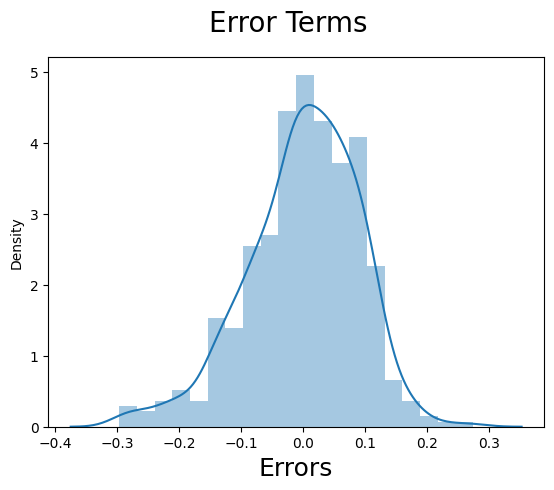

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_clean - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

#### Applying the scaling on the test sets

In [82]:
day_test[day_train_re_col] = scaler.transform(day_test[day_train_re_col])
day_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
410,0.328339,0.323250,0.437599,0.328216,0.618288,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
342,0.253105,0.276102,0.647371,0.124363,0.545181,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
248,0.579122,0.549500,0.890970,0.662895,0.395279,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,False
447,0.530056,0.510125,0.889007,0.351271,0.508437,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,True
421,0.237840,0.208001,0.283059,0.376929,0.511041,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [83]:
day_test.describe()

,temp,atemp,hum,windspeed,cnt
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.534378,0.505528,0.537019,0.361341,0.634255
std,0.231204,0.218380,0.169766,0.157523,0.231605
min,0.039395,-0.022507,0.157196,0.047441,-0.006186
25%,0.339516,0.336352,0.406930,0.256734,0.538991
50%,0.554044,0.541567,0.532926,0.333572,0.673873
75%,0.736951,0.688078,0.654674,0.441983,0.805642
max,0.969469,0.936281,0.903346,0.797450,0.980691


#### Dividing into X_test and y_test

In [84]:
y_test = day_test.pop('cnt')
X_test = day_test

In [85]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)
X_test_m5.head()

,const,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,mnth_3,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
410,1.0,0.328339,0.323250,0.437599,0.328216,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
342,1.0,0.253105,0.276102,0.647371,0.124363,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
248,1.0,0.579122,0.549500,0.890970,0.662895,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,False
447,1.0,0.530056,0.510125,0.889007,0.351271,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,True
421,1.0,0.237840,0.208001,0.283059,0.376929,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [86]:
# Ensure your test data has the same columns as the training data used for the model
X_test_m5_cleaned = X_test_m5[X_train_new_clean_hol.columns]



In [87]:
# Making predictions using the fourth model i.e final model
y_pred_m5 = lr_no_holiday.predict(sm.add_constant(X_test_m5_cleaned))

### Model Evaluation using R-squared score



Text(0, 0.5, 'y_pred_m5')

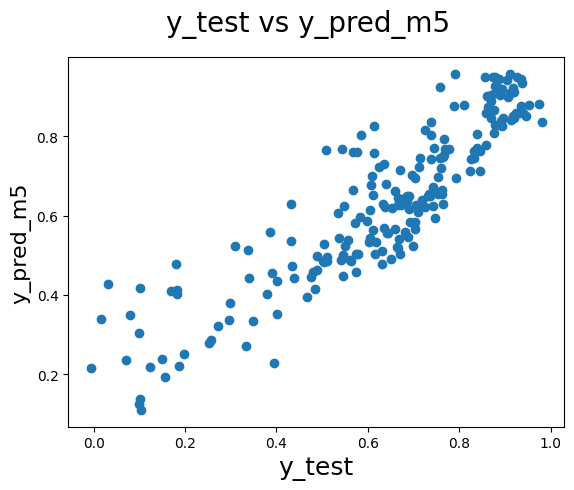

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m5)
fig.suptitle('y_test vs y_pred_m5', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_m5', fontsize=16)                          # Y-label

In [89]:
from sklearn.metrics import r2_score

In [90]:
r2_score(y_true=y_test , y_pred=y_pred_m5)

0.7959037324610283

In [91]:
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lr_no_holiday.params,4))


Coefficent for the variables are:
const                    0.3520
atemp                    0.5458
hum                     -0.1346
windspeed               -0.1123
season_spring           -0.1491
season_winter            0.0978
mnth_3                   0.0426
weathersit_Light Snow   -0.2283
yr_2019                  0.2506
dtype: float64


### **Equation of our best fitted line is:**

**bike Count = ( 0.5458 x atemp ) + (  -0.1491 × season_spring )  + (0.0426 × mnth_3 ) + ( 0.2506 x yr_2019 )+ ( -0.1346 x hum ) + ( -0.1123 x windspeed ) + ( 0.0978 x season_winter ) + ( -0.2283 x weathersit_Light )**

Recommended Variables for Maximizing Bike Demand:

1) Apparent Temperature (atemp):

     Coefficient: 0.5458

   
     Recommendation: Increase apparent temperature (warmer weather conditions) to maximize bike demand. Warmer weather leads to higher demand for bikes.
                                                                                                                                             
3) Year (yr_2019):

      Coefficient: 0.2506

   
      Recommendation: Ensure that 2019-like conditions (the year in the dataset) are in place for optimal bike demand, as the demand was higher in 2019.

5) Month 3 (mnth_3):

     Coefficient: 0.0426

   
     Recommendation: Focus on the month of March (Month 3) to capitalize on higher demand in this period.
                                                                                                                                          